In [9]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Directory with seismic images
image_dir = r'C:\Users\USER\Documents\GitHub\geo-things\Fault Interpretation'  # Use a raw string for Windows paths

# Initialize lists for images and labels
images = ['Seismic Data Interpretation – CB GEOPHYSICAL SOLUTIONS LIMITED.png']
labels = []

# Load images and assign labels
for filename in os.listdir(image_dir):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        image_path = os.path.join(image_dir, filename)

        # Load image with target size (adjust size as needed)
        img = load_img(image_path, target_size=(128, 128), color_mode='rgb')
        img_array = img_to_array(img)

        # Normalize image (scale pixel values to [0, 1])
        img_array = img_array / 255.0

        images.append(img_array)

        # Example labeling based on filename; adjust as needed
        label = 1 if "fault" in filename else 0  # Assume 'fault' images are labeled as 1
        labels.append(label)

# Convert lists to numpy arrays
images = np.array([img for img in images if isinstance(img, np.ndarray)])
labels = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Display shapes for verification
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (4, 128, 128, 3)
Test data shape: (2, 128, 128, 3)
Training labels shape: (4,)
Test labels shape: (2,)


In [14]:
# Normalize images to [0, 1]

X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Define the model
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(128, activation='relu'))

# Output layer (binary classification in this case)
model.add(layers.Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 0.6931 - val_accuracy: 1.0000 - val_loss: 0.6873
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 1.0000 - loss: 0.6873 - val_accuracy: 1.0000 - val_loss: 0.6310
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 1.0000 - loss: 0.6310 - val_accuracy: 1.0000 - val_loss: 0.5113
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 1.0000 - loss: 0.5113 - val_accuracy: 1.0000 - val_loss: 0.3319
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 1.0000 - loss: 0.3319 - val_accuracy: 1.0000 - val_loss: 0.1447
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 1.0000 - loss: 0.1447 - val_accuracy: 1.0000 - val_loss: 0.0339
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 1.0000 - loss: 0.0339 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss

In [27]:
code = """test_loss, test_acc = model.evaluate(X_test, y_test)\u200b"""
cleaned_code = code.replace("\u200b", "")
print(cleaned_code)  # This will output the cleaned code without hidden characters.


test_loss, test_acc = model.evaluate(X_test, y_test)


In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 3.9210e-07


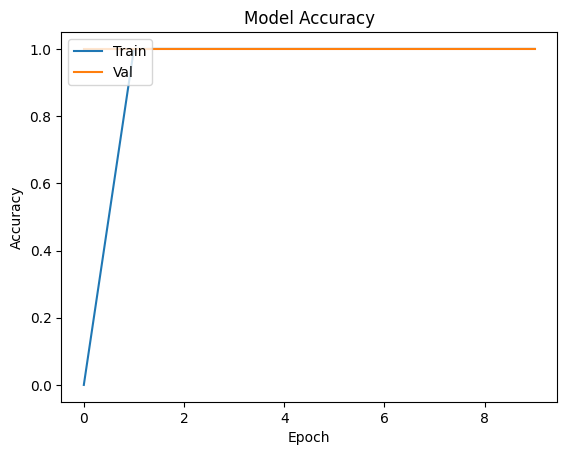

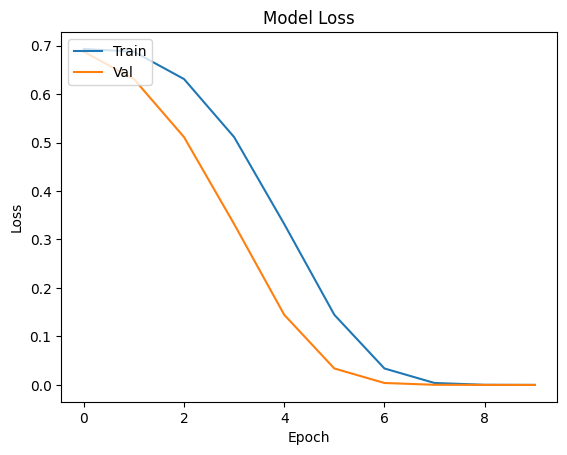

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np

# Set up the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator to the training data
datagen.fit(X_train)

# Train the model with augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 1.0000 - loss: 3.9249e-07 - val_accuracy: 1.0000 - val_loss: 9.7250e-09
Epoch 2/10


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 1.0000 - loss: 9.7368e-09 - val_accuracy: 1.0000 - val_loss: 2.0126e-10
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 1.0000 - loss: 2.0152e-10 - val_accuracy: 1.0000 - val_loss: 3.7183e-12
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 1.0000 - loss: 3.7239e-12 - val_accuracy: 1.0000 - val_loss: 6.5094e-14
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 1.0000 - loss: 6.5193e-14 - val_accuracy: 1.0000 - val_loss: 1.1368e-15
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 1.0000 - loss: 1.1387e-15 - val_accuracy: 1.0000 - val_loss: 2.0681e-17
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 1.0000 - loss: 2.0720e-17 - val_accuracy: 1.0000 - val_loss: 4.0621e-19
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 1.0000 - loss: 4.0705e-19 - val_accuracy: 1.0000 - val_loss: 8.8658e-21
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 1.0000 - lo

In [32]:
if 'accuracy' in history.history:
    model.save('seismic_interpretation_model.h5')
else:
    print("Model has not been trained.")


In [42]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load a new image
new_image_path = r'C:\Users\USER\Documents\GitHub\geo-things\Fault Interpretation\phpX4w7uo.png'  # Correct path to the image

# Load the image and resize it to match the model's input size
new_img = load_img(new_image_path, target_size=(128, 128), color_mode='rgb')

# Convert image to array and normalize (scale to [0, 1])
new_img_array = img_to_array(new_img) / 255.0  

# Add batch dimension to match the model's expected input shape
new_img_array = np.expand_dims(new_img_array, axis=0)

# Predict with the trained model
prediction = model.predict(new_img_array)

# Print the prediction result
print(f"Prediction: {'Fault' if prediction > 0.5 else 'No Fault'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Prediction: No Fault


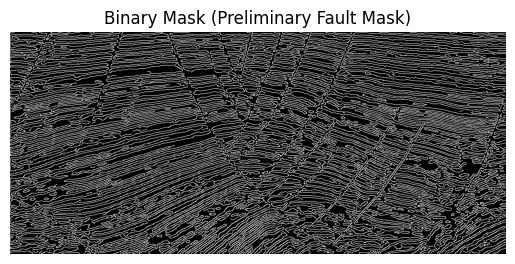

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the seismic image in grayscale
seismic_image = cv2.imread("123.png", cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if seismic_image is not None:
    # Apply Gaussian Blur to reduce noise
    blurred_image = cv2.GaussianBlur(seismic_image, (5, 5), 0)

    # Perform edge detection
    edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

    # Convert to binary mask
    binary_mask = np.where(edges > 0, 1, 0).astype(np.uint8)

    # Display the result
    plt.imshow(binary_mask, cmap="gray")
    plt.title("Binary Mask (Preliminary Fault Mask)")
    plt.axis("off")  # Hide axis ticks and labels
    plt.show()
else:
    print("Error: The image could not be loaded.")

X_train = X_train / 255.0
X_test = X_test / 255.0

In [82]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(128, activation='relu'))

# Output layer (binary classification in this case)
model.add(layers.Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 0.6936 - val_accuracy: 1.0000 - val_loss: 0.6676
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 1.0000 - loss: 0.6694 - val_accuracy: 1.0000 - val_loss: 0.5905
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 1.0000 - loss: 0.5950 - val_accuracy: 1.0000 - val_loss: 0.4502
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 1.0000 - loss: 0.4585 - val_accuracy: 1.0000 - val_loss: 0.2607
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 1.0000 - loss: 0.2707 - val_accuracy: 1.0000 - val_loss: 0.0914
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 1.0000 - loss: 0.0982 - val_accuracy: 1.0000 - val_loss: 0.0154
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 1.0000 - loss: 0.0174 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss

In [86]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 5.2831e-08
Test accuracy: 1.0


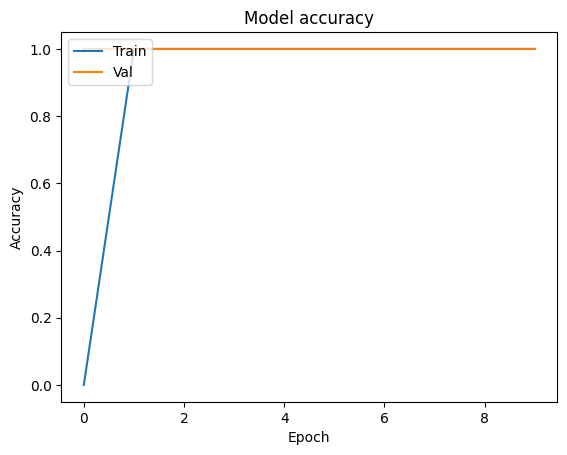

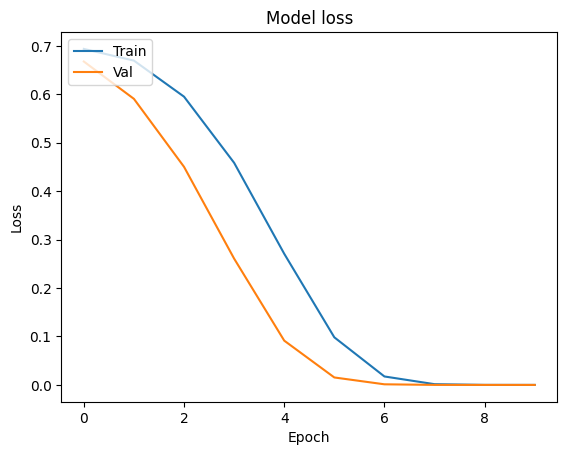

In [87]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator to the training data
datagen.fit(X_train)

# Train the model with augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 1.0000 - loss: 5.6358e-08 - val_accuracy: 1.0000 - val_loss: 9.0933e-10
Epoch 2/10


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 1.0000 - loss: 9.7467e-10 - val_accuracy: 1.0000 - val_loss: 1.2932e-11
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 1.0000 - loss: 1.3071e-11 - val_accuracy: 1.0000 - val_loss: 1.6338e-13
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 1.0000 - loss: 1.7792e-13 - val_accuracy: 1.0000 - val_loss: 1.9547e-15
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 1.0000 - loss: 2.1099e-15 - val_accuracy: 1.0000 - val_loss: 2.3401e-17
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 1.0000 - loss: 2.5222e-17 - val_accuracy: 1.0000 - val_loss: 2.9367e-19
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 1.0000 - loss: 3.2319e-19 - val_accuracy: 1.0000 - val_loss: 4.0143e-21
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 1.0000 - loss: 4.0026e-21 - val_accuracy: 1.0000 - val_loss: 6.1650e-23
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 1.0000 - lo

In [90]:
model.save('seismic_interpretation_model.h5')


In [100]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load a new image (make sure to update the image path)
new_image_path = '789.jpg'

# Load the image and resize it to match the model's input size
new_img = load_img(new_image_path, target_size=(128, 128), color_mode='rgb')

# Convert image to array and normalize (scale to [0, 1])
new_img_array = img_to_array(new_img) / 255.0  

# Add batch dimension to match the model's expected input shape
new_img_array = np.expand_dims(new_img_array, axis=0)

# Predict with the trained model
prediction = model.predict(new_img_array)

# Print the prediction result
print(f"Prediction: {'Fault' if prediction > 0.5 else 'No Fault'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction: No Fault
